<a href="https://colab.research.google.com/github/villafue/LinkedIn_Python_Stastics_Essential_Training/blob/master/03_09_challenge_end.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Python statistics essential training - 03_09_challenge

Standard imports

In [1]:
import numpy as np
import scipy.stats
import pandas as pd
import os

In [12]:
import matplotlib
import matplotlib.pyplot as plt

import pandas.plotting

from IPython import display
from ipywidgets import interact, widgets
# os.chdir('sample_data')

%matplotlib inline

In [3]:
import re
import mailbox
import csv

In [ ]:
'''
Challenge is to plot distribution, by hour, for sent messages separately for each 
day and then overlay the plots for each day.
'''

In [4]:
messages = pd.read_csv('mbox-cleaned.csv')

In [5]:
messages.head()

,subject,from,to,date,dayofweek,timeofday,nyear
0,Why control quickly exactly capital.,"""Vallisneri, Michele (335S)"" <Michele.Vallisne...","""Trevor Charles"" <zrodriguez@hotmail.com>",2017-11-27 14:18:46-08:00,Monday,14.300000,2017.907860
1,Work evidence from really threat sign store see.,Michele Vallisneri <Michele.Vallisneri@jpl.nas...,"""Heather Hernandez"" <patriciagarcia@garcia-car...",2018-03-26 18:38:16-07:00,Monday,18.633333,2018.234843
2,Lot where answer the law person.,"""Vallisneri, Michele (335S)"" <michele.vallisne...",Bryce Dudley <hailey63@frazier.com>,2018-02-13 14:54:50-08:00,Tuesday,14.900000,2018.122165
3,Difference hotel yard.,"""Vallisneri, Michele (335S)"" <Michele.Vallisne...",Kathryn Mathis <josephrebecca@grimes.com>,2018-01-26 11:40:04-08:00,Friday,11.666667,2018.072515
4,Long level mission energy candidate.,"""Vallisneri, Michele (335S)"" <michele.vallisne...","""Angela Mendoza"" <rkhan@yahoo.com>",2017-10-30 17:13:00-07:00,Monday,17.216667,2017.831533


In [7]:
messages['date'] = messages['date'].apply(lambda s: pd.to_datetime(s).tz_convert('America/Los_Angeles'))
messages.head()

,subject,from,to,date,dayofweek,timeofday,nyear
0,Why control quickly exactly capital.,"""Vallisneri, Michele (335S)"" <Michele.Vallisne...","""Trevor Charles"" <zrodriguez@hotmail.com>",2017-11-27 14:18:46-08:00,Monday,14.300000,2017.907860
1,Work evidence from really threat sign store see.,Michele Vallisneri <Michele.Vallisneri@jpl.nas...,"""Heather Hernandez"" <patriciagarcia@garcia-car...",2018-03-26 18:38:16-07:00,Monday,18.633333,2018.234843
2,Lot where answer the law person.,"""Vallisneri, Michele (335S)"" <michele.vallisne...",Bryce Dudley <hailey63@frazier.com>,2018-02-13 14:54:50-08:00,Tuesday,14.900000,2018.122165
3,Difference hotel yard.,"""Vallisneri, Michele (335S)"" <Michele.Vallisne...",Kathryn Mathis <josephrebecca@grimes.com>,2018-01-26 11:40:04-08:00,Friday,11.666667,2018.072515
4,Long level mission energy candidate.,"""Vallisneri, Michele (335S)"" <michele.vallisne...","""Angela Mendoza"" <rkhan@yahoo.com>",2017-10-30 17:13:00-07:00,Monday,17.216667,2017.831533


In [8]:
messages['dayofweek'] = pd.Categorical(messages['dayofweek'],
                                       ordered = True,
                                       categories = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])

In [16]:
days = messages.dayofweek.cat.categories
days

Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'],
      dtype='object')

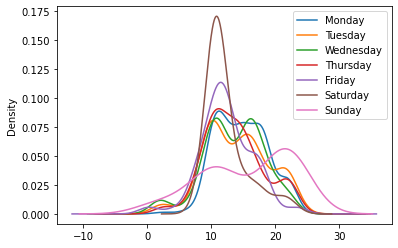

In [13]:
'''
1 of 2 possible solutions:
assign days into an array and loop over them.
We pick the messages dataframe, subset itself and the dayofweek column AND
specify the variable "day." After, we subset the timeofday column and 
plot it. It will loop over every day of the week.
'''

for day in days:
  messages[messages.dayofweek == day].timeofday.plot(kind='density')
  
plt.legend(days)

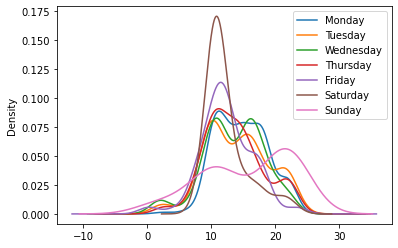

In [15]:
'''
2 of 2 possible solutions:
Groupby does the same thing.
'''
messages.groupby('dayofweek').timeofday.plot(kind='density')
plt.legend(days)